## Introduction 
Autoencoder are special type of deep learning architecture that consist of two networks encoder and decoder.
The encoder, through a series of CNN and downsampling, learns a reduced dimensional representation of the input data while decoder  through the use of CNN and upsampling, attempts to regenerate the data from the these representations. A well-trained decoder is able to regenerated data that is identical or as close as possible to the original input data.
Autoencoder are generally used for anamoly detection, denoising image, colorizing the images. Here, i am going to colorize the landscape images using autoencoder.


In [4]:
import os
import re
import keras
import cv2


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
from tqdm import tqdm


2024-04-02 23:46:00.446999: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 23:46:00.447116: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 23:46:00.733793: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
# to get the files in proper order
#Function sorted_alphanumeric(data):
#This function sorts a list of filenames alphanumerically. It's used to ensure that files are processed in the correct order when read from the file system.
#It does this by defining a custom sorting key alphanum_key which first converts each filename into a list of digits and strings, and then sorts based on that key.
#The function returns the sorted list of filenames.
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
#Constant SIZE = 160:
#This defines the size to which the images will be resized.
SIZE = 160
#Initialization of color_img and gray_img lists:
#These lists will store the processed images.
color_img = []
path = '../input/landscape-image-colorization/landscape Images/color'
#Processing color images:
#It reads filenames from a directory assumed to contain color images.
#The filenames are sorted using the sorted_alphanumeric function.
#It loops over the filenames, reads each image using OpenCV (cv2), converts the image from BGR to RGB format, resizes it to the defined size (SIZE), and then normalizes the pixel values between 0 and 1.
#The resulting image is appended to the color_img list.
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):    
    if i == '6000.jpg':
        break
    else:    
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        color_img.append(img_to_array(img))


gray_img = []
path = '../input/landscape-image-colorization/landscape Images/gray'
#Processing gray images:
#Similar to color images, it reads filenames from a directory assumed to contain grayscale images.
#Filenames are sorted.
#It loops over filenames, reads each image using OpenCV, resizes it to the defined size (SIZE), and normalizes pixel values.
#The resulting image is appended to the gray_img list.
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
     if i == '6000.jpg':
#The loop breaks if the filename is '6000.jpg':
#This seems to be a termination condition to stop processing after reaching a certain filename. It's possibly used for testing or due to specific requirements of the task.
        break
     else: 
        img = cv2.imread(path + '/'+i,1)

        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        gray_img.append(img_to_array(img))


 84%|████████▍ | 6000/7129 [01:02<00:11, 95.56it/s] 


## Plot a pair of images

In [6]:
# Define function to plot images pair
def plot_images(color,grayscale):
    # Create a new figure with a size of 15x15 inches using Matplotlib's plt.figure() function. 
    # All subsequent plots will be drawn on this figure.
    plt.figure(figsize=(15,15))

    # Create the 1st subplot within the figure.
    # Figure should be divided into a grid of 1 row and 3 columns, and the current plot will occupy the 1st position.
    plt.subplot(1,3,1)

    # Sets the title of the plot to be "Color Image". Use green text and a font size of 20.
    plt.title('Color Image', color = 'green', fontsize = 20)

    # Display the color image on the subplot.
    plt.imshow(color)

    # Create the 2nd subplot within the figure.
    # Figure should be divided into a grid of 1 row and 3 columns, and the current plot will occupy the 2nd position.
    plt.subplot(1,3,2)
    
    # Sets the title of the plot to be "Grayscale Image". Use black text and a font size of 20.
    plt.title('Grayscale Image', color = 'black', fontsize = 20)

    # Display the grayscale image on the subplot.
    plt.imshow(grayscale)
   
    # Display the entire figure with the color and grayscale images plotted side by side.
    plt.show()


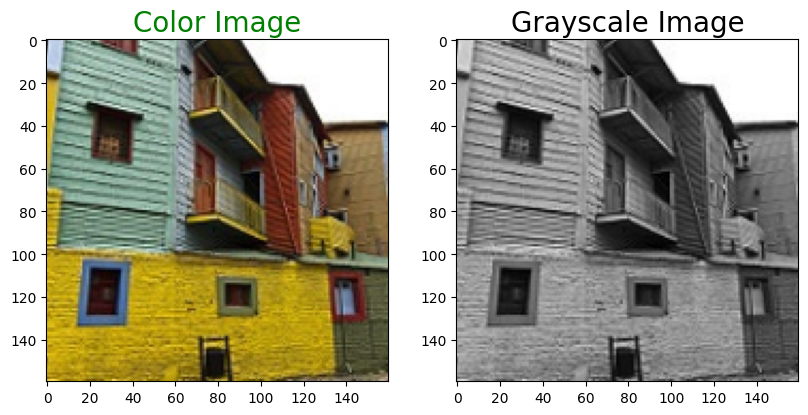

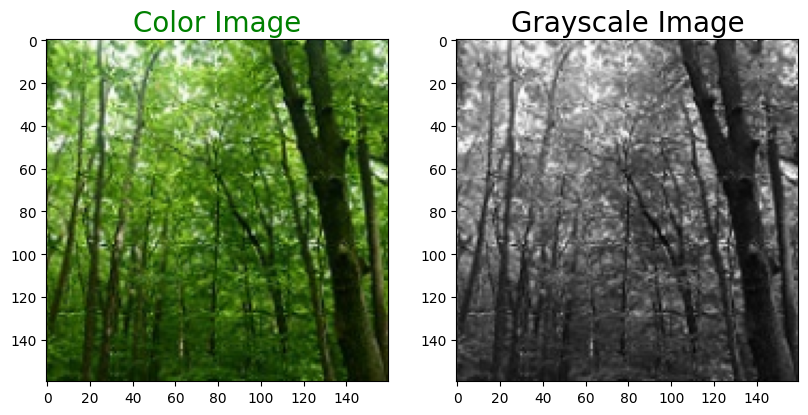

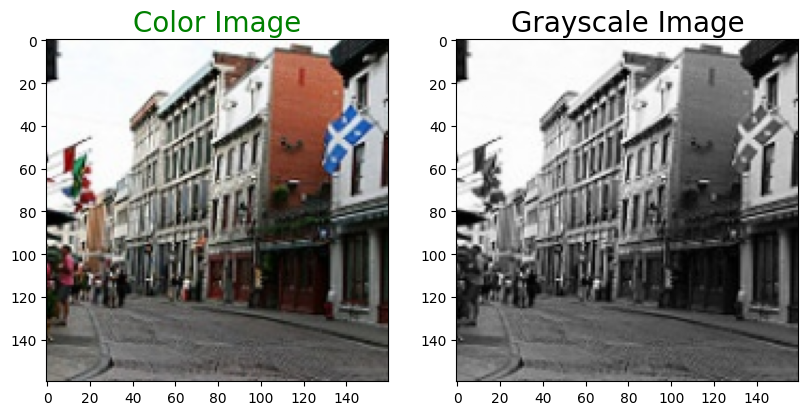

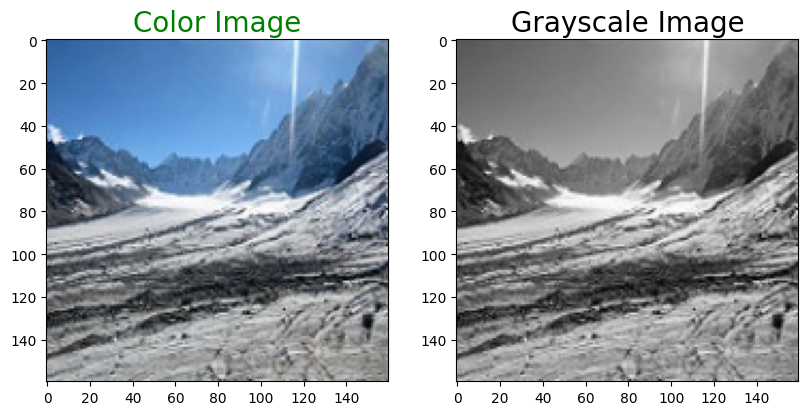

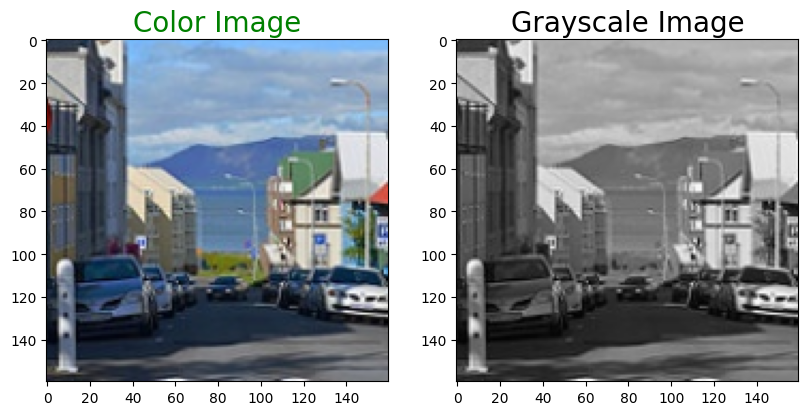

In [7]:
for i in range(1,6):
     plot_images(color_img[i],gray_img[i])


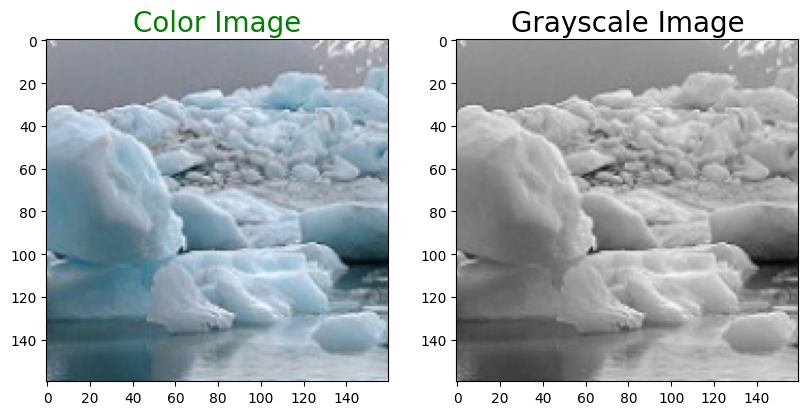

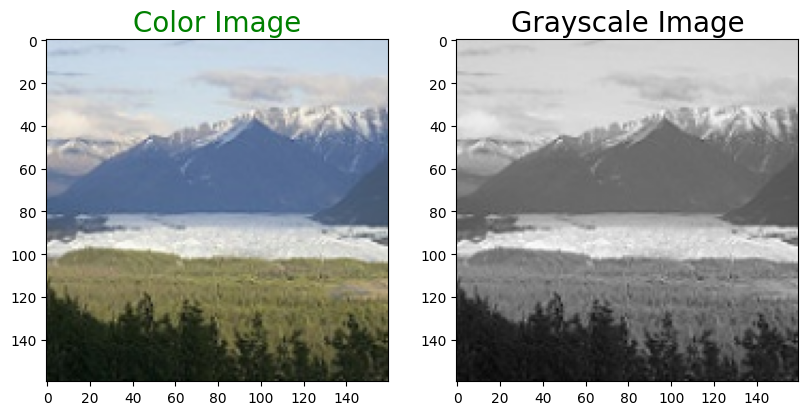

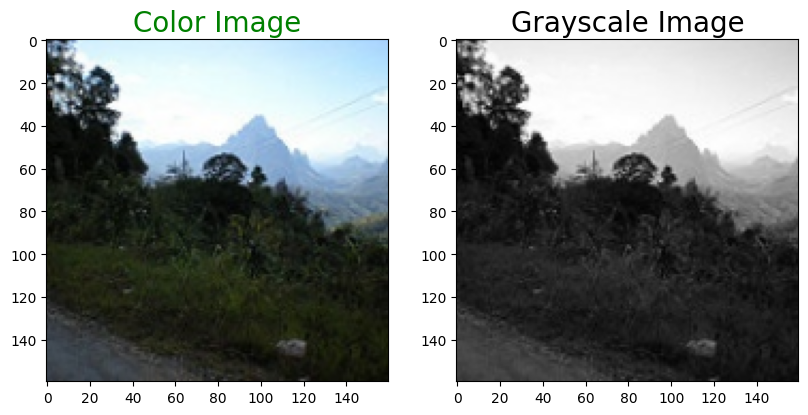

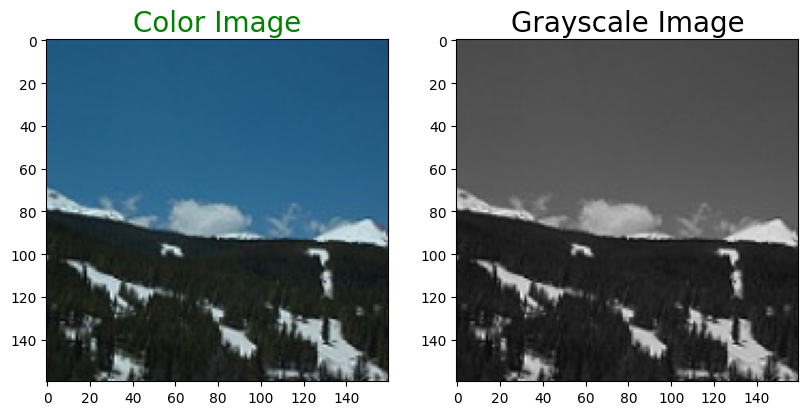

In [8]:
for i in range(6,10):
     plot_images(color_img[i],gray_img[i])


In [9]:
gray_img[100].shape

(160, 160, 3)

In [10]:
color_img[100].shape

(160, 160, 3)

In [11]:
# Verify the number of elements in the gray images dataset that is stored in a gray_img list 
len(gray_img)


6000

In [12]:
# Verify the number of elements in the gray images dataset that is stored in a gray_img list 
len(color_img)

6000

In [13]:
# This line takes 5000 elements from the beginning of the gray_img list and stores them in train_gray_image list.
train_gray_image = gray_img[:5000]

# Similarly to the line above, write a line that would take 5000 items from the beginning of the color_img list and store them in the train_color_image list. 
train_color_image = color_img[:5000]

# This line takes all the elements after the 5000th element and to the last element of the gray_img list and stores these items in the test_gray_image list.
test_gray_image = gray_img[5000:]

# Similarly to the line above, write a line that would take all the elements after the 5000th element and to the last element of the color_img list and store them in the test_color_image list.
test_color_image = color_img[5000:]

In [14]:
train_gray_image = np.reshape(train_gray_image, (len(train_gray_image), SIZE, SIZE, 3))

## Explanation

    This line is reshaping a list called train_gray_image into a new shape using the reshape function from the Numpy library. This line of code reshapes the list train_gray_image containing grayscale images into a new array with the same number of images, but each image is now represented in RGB format with dimensions SIZE x SIZE. The SIZE is set to 160 in the code above (see Step 11). 
    np.reshape: This is a function provided by the NumPy library in Python. It is used to reshape arrays or lists into different dimensions while maintaining the same total number of elements.
train_gray_image: This is the original list containing grayscale images. Each element in this array represents one grayscale image.
(len(train_gray_image), SIZE, SIZE, 3): This tuple specifies the new shape to which the array train_gray_image is being reshaped. Here's what each component means:
len(train_gray_image) is the number of grayscale images in the dataset. The reshaping operation ensures that the number of images remains the same.
SIZE: This represents the dimensions (width and height) of each image. Each image is reshaped to have a height of SIZE pixels and a width of SIZE pixels.
3: This indicates that each image is being reshaped to have three color channels. Typically, this suggests that the grayscale images are being converted to RGB format. Each pixel now has three values (red, green, and blue) instead of one, allowing for color representation.
train_gray_image: This is the name of the new array after reshaping. It will contain the reshaped version of the original array train_gray_image. Since this is the same name as the original array, it means that the original array is being overwritten with the reshaped version.




In [15]:
# Reshape train_color_image 
train_color_image = np.reshape(train_color_image, (len(train_color_image), SIZE, SIZE, 3))
# Reshape test_gray_image
test_gray_image = np.reshape(test_gray_image, (len(test_gray_image), SIZE, SIZE, 3))
# Reshape test_color_image
test_color_image = np.reshape(test_color_image, (len(test_color_image), SIZE, SIZE, 3))

In [16]:
from keras import layers

In [17]:
def down(filters , kernel_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(layers.Conv2D(filters,kernel_size,padding = 'same', strides = 2))
    if apply_batch_normalization:
        downsample.add(layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample


## Explanation

Function Definition:
def down(filters, kernel_size, apply_batch_normalization=True):
This line defines a function named down that takes three parameters: filters, kernel_size, and apply_batch_normalization.
filters: The number of filters (or kernels) in the convolutional layer.
kernel_size: The size of the convolutional kernel.
apply_batch_normalization: A boolean parameter indicating whether batch normalization should be applied after the convolutional layer. By default, it's set to True.
Creating a Sequential Model:
downsample = tf.keras.models.Sequential()
This line initializes a Sequential model, which allows stacking layers sequentially.
Adding Convolutional Layer to the model:
downsample.add(layers.Conv2D(filters, kernel_size, padding='same', strides=2))
layers.Conv2D: This is a 2D convolutional layer from TensorFlow Keras.
filters: The number of filters in the convolutional layer.
kernel_size: The size of the convolutional kernel.
padding='same': specifies that the spatial dimensions of the output volume should be the same as the input volume by adding padding.
strides=2: This specifies the stride of the convolution operation. A stride of 2 downsamples the input feature maps by a factor of 2 along the spatial dimensions.
Adding Batch Normalization Layer:
if apply_batch_normalization:
This conditional statement checks if apply_batch_normalization is True.
downsample.add(layers.BatchNormalization())
If apply_batch_normalization is True, this line adds a Batch Normalization layer to the model.
Batch normalization helps stabilize and speed up the training process by normalizing the input to each layer.
Adding Activation Layer:
downsample.add(keras.layers.LeakyReLU())
This line adds a Leaky ReLU activation layer.
Leaky ReLU allows a small, non-zero gradient when the input is negative, which helps prevent dying ReLU units during training.
Returning the Model:
return downsample
Finally, the function returns the Sequential model saved in the downsample variable, which represents the downsampling block.


In [18]:
# Add three parameters: filters, kernel_size  and dropout. The dropout must have a default value of False.
def up(filters, kernel_size, dropout = False):
    # initializes a Sequential model and store it in the upsample variable
    upsample = tf.keras.models.Sequential()
    # Add a Conv2DTranspose layer to the model. It must take the same parameters as the Conv2D layer in the example given above.
    upsample.add(layers.Conv2DTranspose(filters,kernel_size,padding = 'same', strides = 2))

    # Use if to verify that dropout is set to True (follow the example above).
    if dropout:
        # Set models dropout rate to 0.2
        Upsample.dropout( 0.2 )

    # Add a Leaky ReLU activation layer to the model.
    upsample.add(keras.layers.LeakyReLU())
    # Return the model.
    return upsample


In [19]:
# Define a function called set_model that does not take any arguments
def set_model():
    # Create an input layer for the model with a shape of [160,160,3], indicating input images of size 160x160 pixels with 3 color channels (RGB). Store the output in the inputs variable.
    inputs = layers.Input(shape= [160,160,3])

    # Downsampling begins.
    # Apply a downsampling block (down) with 128 filters and a kernel size of (3,3) to the input layer (inputs). 
    # Store the output in d1. 
    # The False argument indicates that batch normalization is not applied in this block.
    d1 = down(128,(3,3),False)(inputs)

    # Apply a downsampling block with 128 filters and a kernel size of (3,3) to the d1 layer.  
    # Store the output in d2. Do not apply batch normalization in this block.
    d2 = down(128,(3,3),False)(d1)

    # Apply a downsampling block with 256 filters and a kernel size of (3,3) to the d2 layer.  
    # Store the output in d3. Apply batch normalization in this block.
    d3 = down(256,(3,3),True)(d2)

  
    # Apply a downsampling block with 512 filters and a kernel size of (3,3) to the d3 layer.  
    # Store the output in d4. Apply batch normalization in this block.
    d4 = down(512,(3,3),True)(d3)
    
   
    # Apply a downsampling block with 512 filters and a kernel size of (3,3) to the d4 layer.  
    # Store the output in d5. Apply batch normalization in this block.
    d5 = down(512,(3,3),True)(d4) 

    # Upsampling begins.
    # Apply the up function to upsample the d5 layer. 
    # Set the upsampling block to have 512 filters and a kernel size of (3,3). 
    # False indicates that dropout is not applied.
    # Store the output in the variable u1.
    u1 = up(512,(3,3),False)(d5)

    # Concatenate the upsampled u1 layer with the d4 layer.
    # Use the layers.concatenate function from TensorFlow Keras to concatenate u1 and d4.
    # Store the output in the variable u1.
    # Concatenation is used to combine downsampled info with upsampled info to get high-resolution details.
    u1 = layers.concatenate([u1,d4])

    # Apply the up function to upsample the u1 layer. 
    # Use 256 filters in the upsampling block and a (3,3) kernel size. 
    # Do not apply dropout. Store the output in the variable u2.
    u2 = up(256,(3,3), False)(u1)

    # Concatenate the u2 and d3 layers.
    # Store the output in variable u2.
    u2 = layers.concatenate([u2,d3])

    # Apply the up function to upsample the u2 layer. 
    # Use 128 filters in the upsampling block and a (3,3) kernel size. 
    # Do not apply dropout. Store the output in the variable u3.
    u3 = up(128,(3,3), False)(u2)

    # Concatenate the u3 and d2 layers.
    # Store the output in variable u3.
    u3 = layers.concatenate([u3,d2])


    #  Upsample the u3 layer. 
    # Use 128 filters in the upsampling block and a (3,3) kernel size. 
    # Do not apply dropout. Store the output in the variable u4.
    u4 = up(128,(3,3), False)(u3)

    # Concatenate the u4 and d1 layers.
    # Store the output in variable u4.
    u4 = layers.concatenate([u4,d1])

    # Upsample the u4 layer. 
    # Use 3 filters in the upsampling block and a (3,3) kernel size. 
    # Do not apply dropout. Store the output in the variable u55.
    u5 = up(3,(3,3), False)(u4)

    # Concatenate the u5 and inputs layers.
    # Store the output in variable u5.
    u5 = layers.concatenate([u5,inputs])

    #downsample.add(layers.Conv2D(filters,kernel_size,padding = 'same', strides = 2))

        # Define the output layer of the network as a 2D convolutional layer that is connected to the u5 layer. 
        # The layer must have 3 filters, each with a 2x2 kernel size
        # Use the stride of 1 that would mean that the filter slides one pixel at a time.
        # The output will have the same spatial dimensions as the input through the use of 'same' padding.
    output = layers.Conv2D( 3,(2,2),strides = 1, padding = 'same' )(u5)

        # Create and return a Keras Model object that represents the NN architecture defined earlier in the function. 
        # The model takes inputs as its input(s) and produces output as its output(s)
        # Later, the model can be used for training, evaluation, and prediction.
    return tf.keras.Model(inputs=inputs, outputs=output)


In [20]:
model = set_model()

In [21]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 80, 80,    │      3,584 │ input_layer[0][0] │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 40, 40,    │    147,584 │ sequential[0][0]  │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 20, 20,    │    296,192 │ sequential_1[0][… │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_3        │ (None, 10, 10,    │  1,182,208 │ sequential_2[0][… │
│ (Sequential)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_4        │ (None, 5, 5, 512) │  2,361,856 │ sequential_3[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_5        │ (None, 10, 10,    │  2,359,808 │ sequential_4[0][… │
│ (Sequential)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 10, 10,    │          0 │ sequential_5[0][… │
│ (Concatenate)       │ 1024)             │            │ sequential_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_6        │ (None, 20, 20,    │  2,359,552 │ concatenate[0][0] │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 20, 20,    │          0 │ sequential_6[0][… │
│ (Concatenate)       │ 512)              │            │ sequential_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_7        │ (None, 40, 40,    │    589,952 │ concatenate_1[0]… │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 40, 40,    │          0 │ sequential_7[0][… │
│ (Concatenate)       │ 256)              │            │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_8        │ (None, 80, 80,    │    295,040 │ concatenate_2[0]… │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 80, 80,    │          0 │ sequential_8[0][… │
│ (Concatenate)       │ 256)              │            │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_9        │ (None, 160, 160,  │      6,915 │ concatenate_3[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 160, 160,  │          0 │ sequential_9[0][… │
│ (Concatenate)       │ 6)                │            │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 160, 160,  │         75 │ concatenate_4[0]

 Total params: 9,602,766 (36.63 MB)

 Trainable params: 9,600,206 (36.62 MB)

 Non-trainable params: 2,560 (10.00 KB)

## Explanation of the output: 
Layer Names: Each layer in the model is listed by its name.
Layer Type: The type of each layer is specified (e.g., Dense, Conv2D, MaxPooling2D, etc.).
Output Shape: The shape of the output produced by each layer is listed. This shows the dimensions of the output tensor after passing through each layer.
Number of Parameters: The number of trainable and non-trainable parameters in each layer is displayed. Trainable parameters are those that are updated during training, while non-trainable parameters are those that are not updated (e.g., in a BatchNormalization layer, the mean and variance are non-trainable parameters).
Total Parameters: The total number of parameters in the model is displayed. This includes both trainable and non-trainable parameters.

In [22]:
# Use the compile function from TensorFlow's Keras API to configure the model for training. 
# Specify to use the Adam optimizer with a learning rate of 0.001
# Optimize for mean_absolute_error loss function
# Use accuracy (‘acc’) as the evaluation metric. 

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate = 0.001), 
              loss = 'mean_absolute_error', 
              metrics = ['acc'])


In [23]:
# Use the fit function from TensorFlow's Keras API to train the neural network model 
# Use the training data from train_gray_image and train_color_image.
# Set the fixed number of epochs to 50.
# Set batch size to 50.
# Complete training in the silent mode (verbose = 0). 

model.fit( train_gray_image, train_color_image, epochs = 50, batch_size = 50, verbose = 0)


I0000 00:00:1712101754.630953      92 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [74]:
def plot_images(color, grayscale, predicted):
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 3, 1)
    plt.title('Color Image', color='green', fontsize=20)
    plt.imshow(color)
    
    plt.subplot(1, 3, 2)
    plt.title('Grayscale Image', color='black', fontsize=20)
    plt.imshow(grayscale)
    
    plt.subplot(1, 3, 3)
    plt.title('Predicted Image', color='blue', fontsize=20)
    plt.imshow(predicted)

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


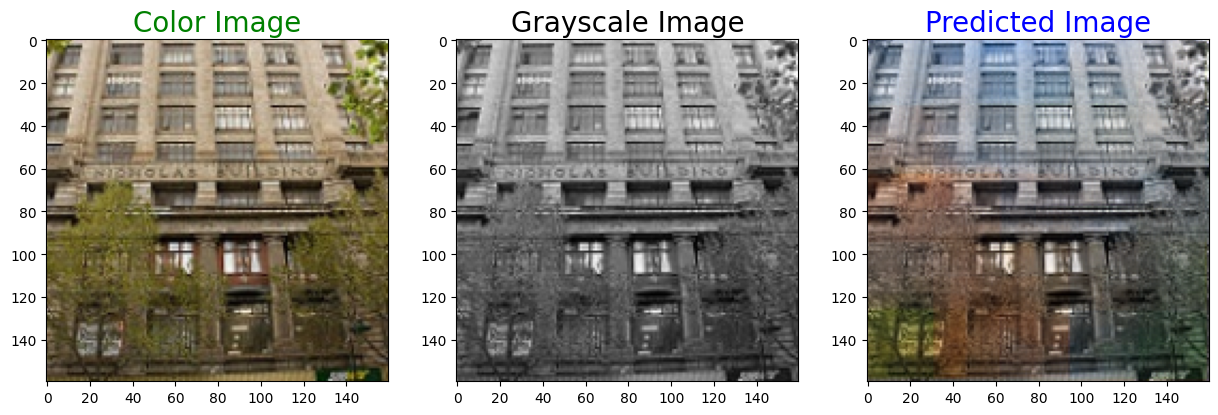

NameError: name 'color_image' is not defined

In [75]:
for i in range(50,56):
    predicted = np.clip(model.predict(test_gray_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_color_image[i],test_gray_image[i],predicted)


## Code Explanation:
This loop runs for the following values of i: 50, 51, 52, 53, 54 and 55. For each index i, the code selects the i-th grayscale image from the test_gray_image array.
It is used to generate predictions (color images) for a subset of grayscale images with indices equal to the values of i from the test dataset (test_gray_image). 
Explanation for the line:
predicted = np.clip(model.predict(test_gray_image[i].reshape(1, SIZE, SIZE, 3)), 0.0, 1.0).reshape(SIZE, SIZE, 3)
Code reshapes the grayscale image to match the expected input shape of the model (1 x SIZE x SIZE x 3) using .reshape(1, SIZE, SIZE, 3). Remember, that the SIZE variable was set to 160 upstream in the code.
Code passes the reshaped grayscale image to the model for prediction using model.predict().
The output prediction is clipped between 0.0 and 1.0 using np.clip() to ensure that pixel values are within a valid range for RGB images.
Finally, the prediction is reshaped back to the original image dimensions (SIZE x SIZE x 3) for visualization.
Then the code plots the original color images (test_color_image) and their corresponding grayscale images. 
Then the code compares these original images with the predicted color images generated by the autoencoder model. 
Each iteration of the loop corresponds to a different grayscale image and its prediction.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


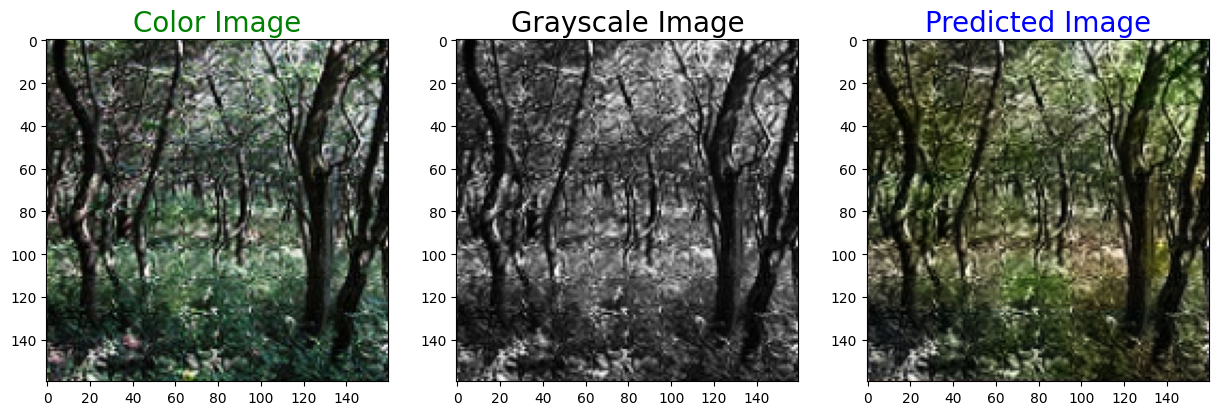

NameError: name 'color_image' is not defined

In [76]:
for i in range(100, 110):
    predicted = np.clip(model.predict(test_gray_image[i].reshape(1, SIZE, SIZE, 3)), 0.0, 1.0).reshape(SIZE, SIZE, 3)
    plot_images(test_color_image[i], test_gray_image[i], predicted)